In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [250]:
from statsmodels.tsa.arima_model import ARMA, ARIMA,ARMAResults, ARIMAResults

In [252]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
from pmdarima import auto_arima

In [433]:
df1 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq='D'

In [435]:
df1.isna().sum()

Births    0
dtype: int64

<Axes: xlabel='Date'>

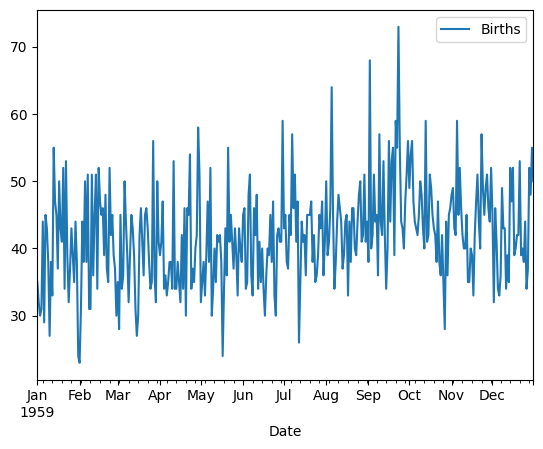

In [437]:
df1.plot()

In [439]:
#df1 = df1[:120]

In [441]:
#df1.plot()

In [740]:
df2 = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq='MS'

In [742]:
df2.isna().sum()

Inventories    0
dtype: int64

<Axes: xlabel='Date'>

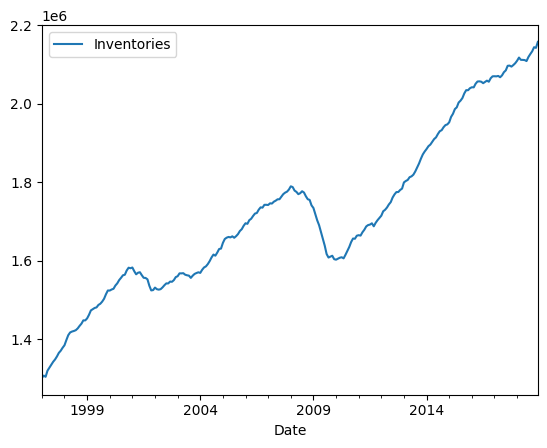

In [744]:
df2.plot()

# DF1

# ARMA

In [615]:
from statsmodels.tsa.stattools import adfuller

In [617]:
dftest = adfuller(df1['Births'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# lags used', '# Observations'])

for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

if dfout.values[1] < 0.05:
    print("On rejette l'hypothèse nule donc la série est stationnaire")
else:
    print("On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire")

On rejette l'hypothèse nule donc la série est stationnaire


In [619]:
dfout

ADF Test Statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# Observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64

In [621]:
auto_arima(df1['Births'], d=0, seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3776.976, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2656.891, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3407.164, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2474.496, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2471.358, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2472.653, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2471.853, Time=0.18 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2474.814, Time=0.39 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0]          
Total fit time: 1.928 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1231.679
Date:                Thu, 13 Mar 2025   AIC                           2471.358
Time:                        19:26:03   BIC                           2486.957
Sample:                    01-01-1959   HQIC                          2477.557
                         - 12-31-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1251      0.060     18.763      0.000       1.008       1.243
ar.L2         -0.1251      0.060     -2.087      0.037      -0.243      -0.008
ma.L1         -0.9623      0.017    -55.585      0.000      -0.996      -0.928
sigma2        49.1469      3.301     14.889      0.000      42.677      55.617
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                24.86
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

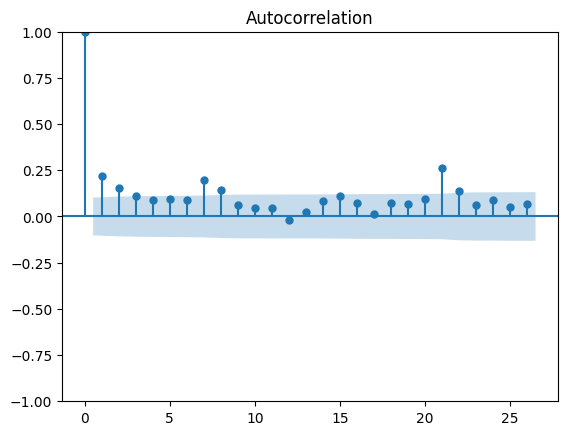

In [622]:
plot_acf(df1);

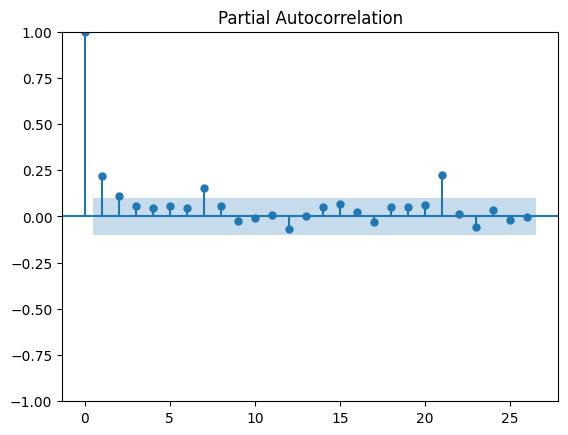

In [623]:
plot_pacf(df1);

In [624]:
df1.shape

(365, 1)

In [627]:
365*80/100

292.0

In [631]:
train = df1.iloc[:290]
test = df1.iloc[290:]

In [633]:
model = ARIMA(train['Births'], order=(2, 0, 1))

In [635]:
results = model.fit()

In [637]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Births   No. Observations:                  290
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -981.565
Date:                Thu, 13 Mar 2025   AIC                           1973.131
Time:                        19:26:12   BIC                           1991.480
Sample:                    01-01-1959   HQIC                          1980.482
                         - 10-17-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.3955      5.590      7.585      0.000      31.440      53.351
ar.L1          1.0670      0.076     13.994      0.000       0.918       1.216
ar.L2         -0.0723      0.069     -1.040      0.298      -0.208       0.064
ma.L1         -0.9521      0.044    -21.883      0.000      -1.037      -0.867
sigma2        50.8100      3.880     13.095      0.000      43.205      58.415
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.38
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.59
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [639]:
start = len(train)
end = len(train) + len(test) -1

In [643]:
predictions = results.predict(start, end).rename('ARMA (2,1) Predictions')

<Axes: xlabel='Date'>

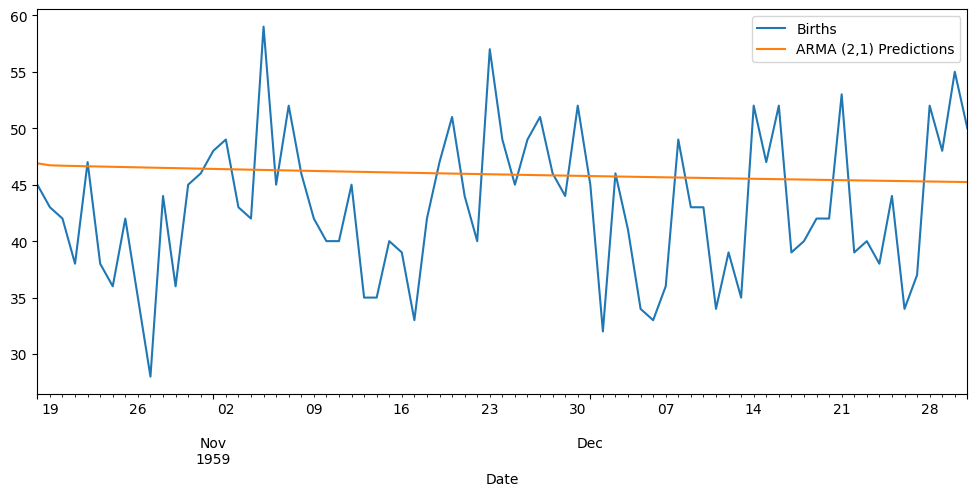

In [645]:
test['Births'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)

In [647]:
test.mean()

Births    43.053333
dtype: float64

In [649]:
predictions.mean()

45.93232427158983

Bien que le modèle n'est pas pu prédire les bruits de la série, les moyennes des données de test et des prédictions sont presque identiques. 

# DF2

<Axes: xlabel='Date'>

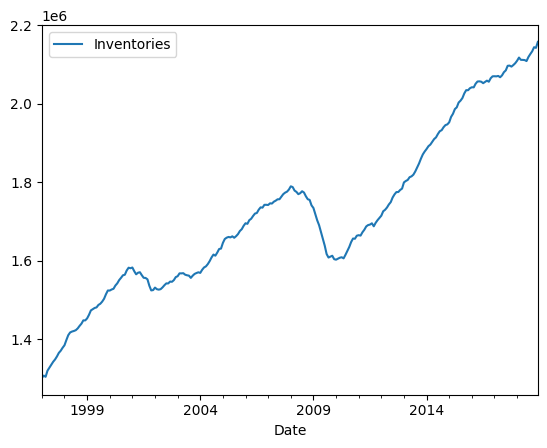

In [746]:
df2.plot()

In [748]:
from statsmodels.tsa.seasonal import seasonal_decompose

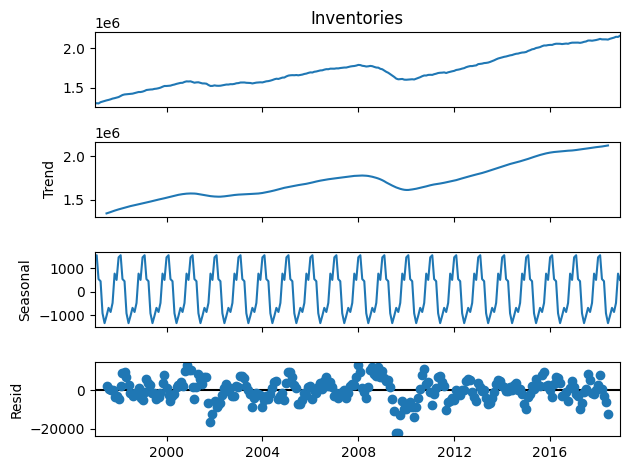

In [750]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [752]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 13 Mar 2025   AIC                           5348.037
Time:                        19:39:43   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [754]:
from statsmodels.tsa.statespace.tools import diff

In [756]:
df2['diff_1'] = diff(df2['Inventories'], k_diff=1)

<Axes: xlabel='Date'>

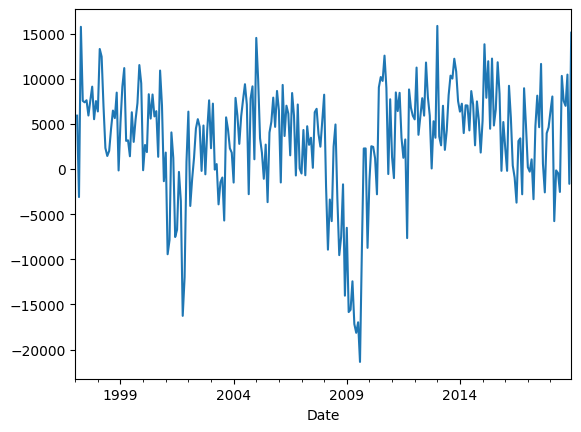

In [758]:
df2['diff_1'].plot()

In [760]:
dftest = df2['diff_1'].dropna()

In [764]:
dftest = adfuller(dftest)
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# lags used', '# Observations'])

for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

if dfout.values[1] < 0.05:
    print("On rejette l'hypothèse nule donc la série est stationnaire")
else:
    print("On ne rejette pas l'hypothèse nule donc la série n'est pas stationnaire")

On rejette l'hypothèse nule donc la série est stationnaire


In [766]:
dfout

ADF Test Statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# Observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
dtype: float64

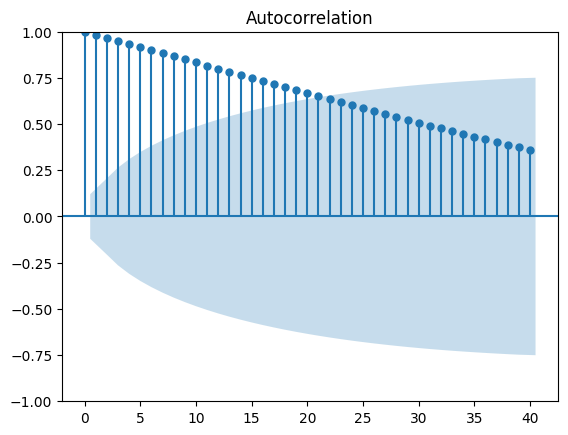

In [768]:
plot_acf(df2['Inventories'], lags=40);

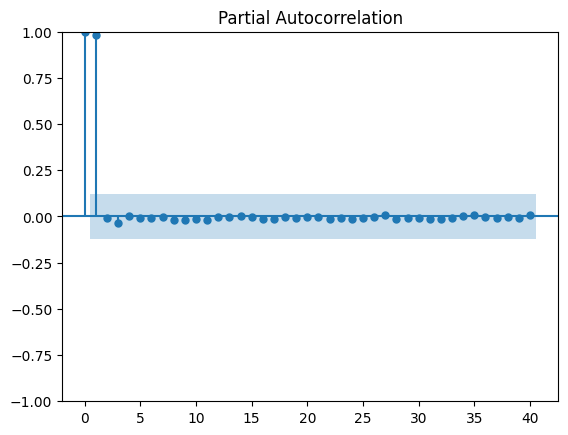

In [770]:
plot_pacf(df2['Inventories'], lags=40);

Selon une étude de l'université de Duke, lorsque le PACF affiche une coupure nette et l'ACF se désintègre progressivement avec l'évolution des lags, l'autocorrélation peut à elle seule expliquée l'évolution de la série. La la Moving Average peut être mise à 0. 

In [680]:
# p = 1
# d = 1
# q = 1

In [917]:
stepwise_fit = auto_arima(df2['Inventories'], start_p = 0, start_q = 0, max_p = 5, max_q = 5, seasonal = False, trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.259 seconds


In [919]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Fri, 14 Mar 2025   AIC                           5348.037
Time:                        00:25:42   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [921]:
len(df2)

264

In [923]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [925]:
model = ARIMA(train['Inventories'], order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2579.217
Date:                Fri, 14 Mar 2025   AIC                           5160.434
Time:                        00:25:49   BIC                           5163.959
Sample:                    01-01-1997   HQIC                          5161.852
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.911e+07   4.75e+06     10.330      0.000    3.98e+07    5.84e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               105.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -1.20
Prob(H) (two-sided):                  0.62   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [927]:
start = len(train)
end = len(train) + len(test) -1

In [929]:
predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(0,1,0) Predictions')

In [931]:
predictions

2018-01-01    2103751.0
2018-02-01    2103751.0
2018-03-01    2103751.0
2018-04-01    2103751.0
2018-05-01    2103751.0
2018-06-01    2103751.0
2018-07-01    2103751.0
2018-08-01    2103751.0
2018-09-01    2103751.0
2018-10-01    2103751.0
2018-11-01    2103751.0
2018-12-01    2103751.0
Freq: MS, Name: ARIMA(0,1,0) Predictions, dtype: float64

<Axes: xlabel='Date'>

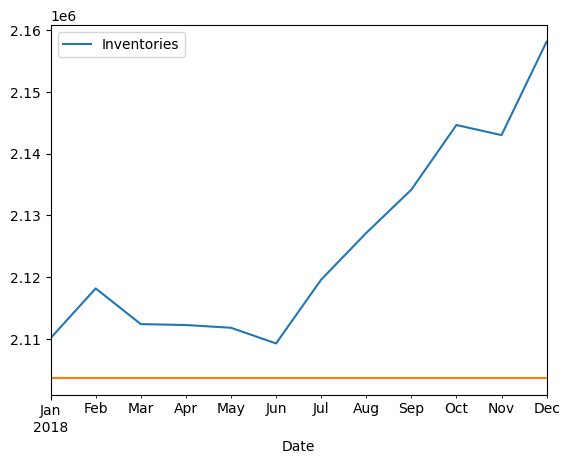

In [933]:
test['Inventories'].plot(legend=True)
predictions.plot()

In [935]:
from statsmodels.tools.eval_measures import rmse

In [937]:
error = rmse(test['Inventories'], predictions)

In [939]:
error

26437.5793931038

In [941]:
test['Inventories'].mean()

2125075.6666666665

In [943]:
predictions.mean()

2103751.0

In [947]:
model = ARIMA(df2['Inventories'], order=(0,1,0))
results = model.fit()

In [949]:
forecast = results.predict(start = len(df2), end = len(df2)+ 11, typ='levels').rename('ARIMA(0, 1, 0) Forecast')
forecast

2019-01-01    2158115.0
2019-02-01    2158115.0
2019-03-01    2158115.0
2019-04-01    2158115.0
2019-05-01    2158115.0
2019-06-01    2158115.0
2019-07-01    2158115.0
2019-08-01    2158115.0
2019-09-01    2158115.0
2019-10-01    2158115.0
2019-11-01    2158115.0
2019-12-01    2158115.0
Freq: MS, Name: ARIMA(0, 1, 0) Forecast, dtype: float64

<Axes: xlabel='Date'>

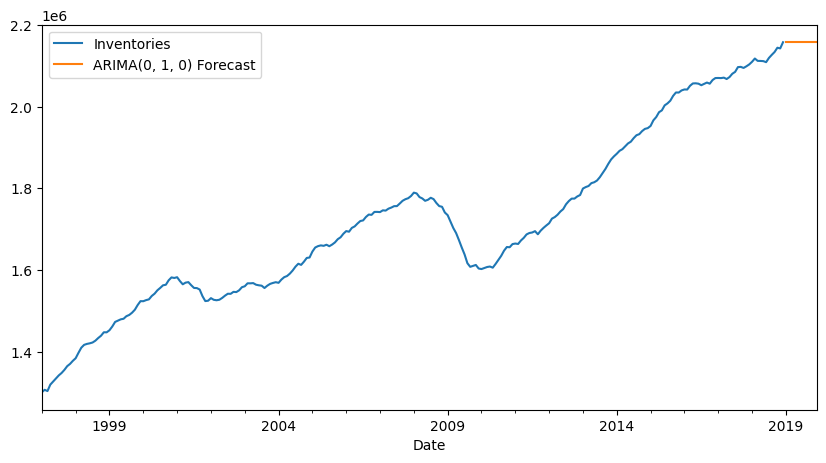

In [953]:
df2['Inventories'].plot(legend=True, figsize=(10,5))
forecast.plot(legend=True)

L'AR et la MA sont à 0 donc les données passées ne peuvent prédire le future donc le modèle ARIMA n'est pas approprié

## SARIMA

In [885]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [887]:
auto_sarima = auto_arima(train["Inventories"], 
                         seasonal=True,       
                         m=12,                
                         start_p=0, max_p=3,  
                         start_q=0, max_q=3,  
                         start_P=0, max_P=2,  
                         start_Q=0, max_Q=2,  
                         d=1, D=1,           
                         trace=True,          
                         error_action="ignore", 
                         suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5012.443, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5029.090, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5018.976, Time=0.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5018.494, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5014.280, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=5018.647, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5027.572, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5017.384, Time=0.07 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=5013.962, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.402 seconds


In [889]:
sarima_model = SARIMAX(train["Inventories"], order=(0,1,0), seasonal_order=(0,1,0,12))

sarima_result = sarima_model.fit()

sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        Inventories   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -2505.222
Date:                            Fri, 14 Mar 2025   AIC                           5012.443
Time:                                    00:11:54   BIC                           5015.920
Sample:                                01-01-1997   HQIC                          5013.844
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.056e+07   4.96e+06     14.217      0.000    6.08e+07    8.03e+07
===================================================================================
Ljung-Box (L1) (Q):                  65.82   Jarque-Bera (JB):                14.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.27
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [891]:
predictions = sarima_result.predict(start=start, end=end, typ='levels').rename('SARIMA(0, 1, 0)x(0, 1, 0, 12) Predictions')

<Axes: xlabel='Date'>

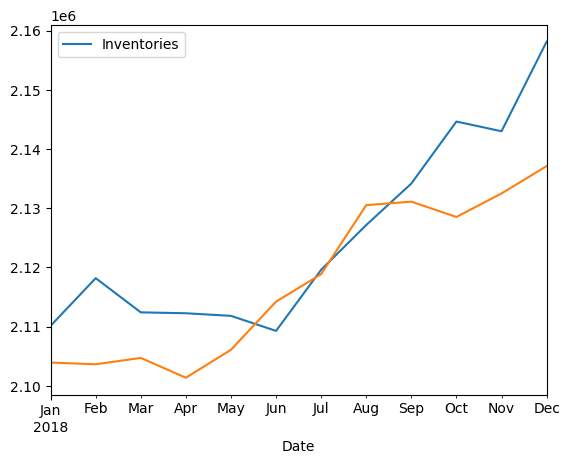

In [893]:
test['Inventories'].plot(legend=True)
predictions.plot()

In [895]:
error = rmse(test['Inventories'], predictions)
error

10474.948488337941

In [897]:
test['Inventories'].mean()

2125075.6666666665

In [900]:
predictions.mean()

2117729.0

## Forecast the future

In [905]:
sarima_model = SARIMAX(df2["Inventories"], order=(0,1,0), seasonal_order=(0,1,0,12))

sarima_result = sarima_model.fit()

In [909]:
forecast = sarima_result.predict(start = len(df2), end = len(df2)+ 11, typ='levels').rename('SARIMA(0, 1, 0)x(0, 1, 0, 12) Forecast')
forecast

2019-01-01    2164522.0
2019-02-01    2172563.0
2019-03-01    2166791.0
2019-04-01    2166640.0
2019-05-01    2166199.0
2019-06-01    2163662.0
2019-07-01    2173982.0
2019-08-01    2181534.0
2019-09-01    2188536.0
2019-10-01    2199003.0
2019-11-01    2197365.0
2019-12-01    2212479.0
Freq: MS, Name: SARIMA(0, 1, 0)x(0, 1, 0, 12) Forecast, dtype: float64

In [915]:
sarima_result.forecast(steps=12)

2019-01-01    2164522.0
2019-02-01    2172563.0
2019-03-01    2166791.0
2019-04-01    2166640.0
2019-05-01    2166199.0
2019-06-01    2163662.0
2019-07-01    2173982.0
2019-08-01    2181534.0
2019-09-01    2188536.0
2019-10-01    2199003.0
2019-11-01    2197365.0
2019-12-01    2212479.0
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

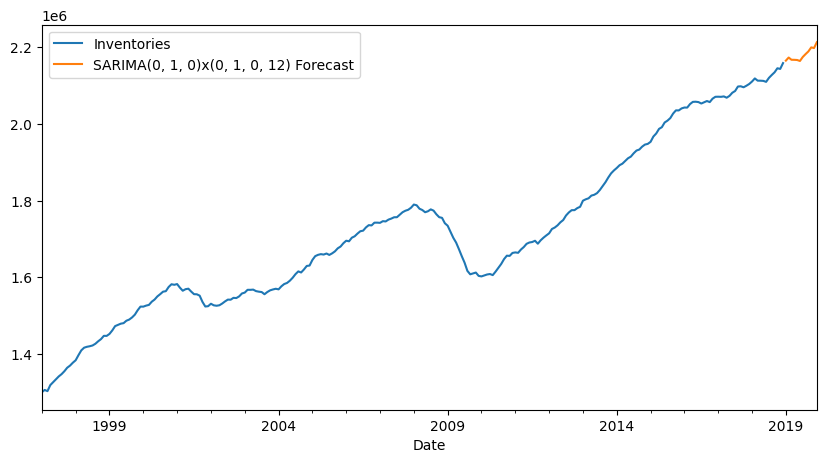

In [911]:
df2['Inventories'].plot(legend=True, figsize=(10,5))
forecast.plot(legend=True)

Avec le modèle SARIMA, Le score rmase ainsi que la comparaison de moyenne est beaucoup mieux que le modèle ARIMA. Ce modèle est approprié pour faire la prédicrion